<a href="https://colab.research.google.com/github/simbrizzy/Brizzy101/blob/master/Electricy_Usage_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
#Specify the path for the data file
file_path = r"/content/Data for candidate.xlsx"

# Read the Excel file and skip the first two rows, using the third row as the header
df = pd.read_excel(file_path, skiprows=2, header=0)

# Preview the first top rows
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [13]:
# Checking the shape of the dataset
df.shape

(8760, 4)

In [15]:
# Checking the datatypes of the dataset
df.dtypes

Hour                                           int64
Date/hour start                       datetime64[ns]
Solar electricity generation (kWh)           float64
Electricity usage (kWh)                      float64
dtype: object

In [64]:
#creating a graph showing the average solar electricity generation and average electricity usage for each hour in a day,
# i.e. the average over all amounts for 1 am, and each subsequent hour within a 24-hour period.
# and investigating any significant outliers.
# first thing is we extract the hour from the Date/hour start and create a new column
Time=df['Date/hour start'].dt.hour
df['Time']= Time
df.head()


,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Time
0,0,2020-01-01 00:00:00,0.0,1.509849,0
1,1,2020-01-01 01:00:00,0.0,1.411859,1
2,2,2020-01-01 02:00:00,0.0,1.023898,2
3,3,2020-01-01 03:00:00,0.0,0.642000,3
4,4,2020-01-01 04:00:00,0.0,0.960000,4


In [65]:
# Grouping the data by 'Hour' and calculating the average for 'Solar electricity generation (kWh)' and 'Electricity usage (kWh)'
hourly_average = df.groupby('Hour')[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']].mean()
print(hourly_average)

      Solar electricity generation (kWh)  Electricity usage (kWh)
Hour                                                             
0                               0.000000                 0.816471
1                               0.035753                 0.401552
2                               0.000000                 0.250623
3                               0.000000                 0.407688
4                               0.078559                 0.552038
5                               0.270625                 0.610852
6                               0.722868                 2.084071
7                               1.394885                 1.788123
8                               2.206044                 1.798899
9                               2.941512                 1.681553
10                              3.504041                 1.807175
11                              3.751915                 1.685425
12                              3.495879               128.000444
13        

<Figure size 1000x600 with 0 Axes>

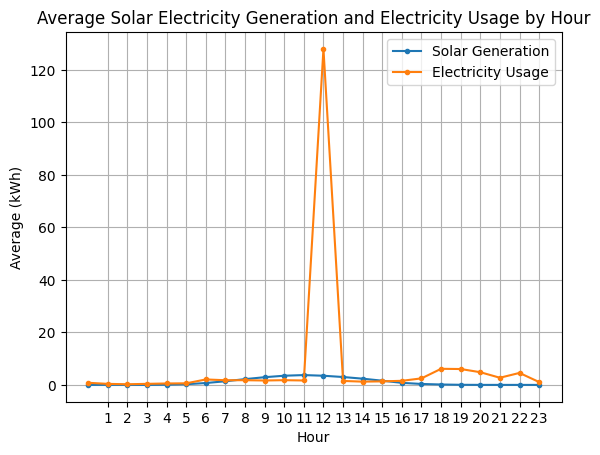

In [66]:
# Creating a line plot that will enable us to identify any outliers
plt.figure(figsize=(10, 6))
hourly_average.plot(kind='line', marker='.')
plt.title('Average Solar Electricity Generation and Electricity Usage by Hour')
plt.xlabel('Hour')
plt.ylabel('Average (kWh)')
plt.grid(True)
plt.xticks(range(1,24))  # Assuming you want to show all hours from 0 to 23
plt.legend(['Solar Generation', 'Electricity Usage'])
plt.show()

In [67]:
#Electricity usage at hour 12 is so high and might be considered an outlier. to solve the issue, We might consider replacing that outlier with the median for the hour/day
df.describe() # gives us the overal statistics of the data wher we get the median


,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Time
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,7.312704,11.500000
std,6.922582,2.026098,491.479806,6.922582
min,0.000000,0.000000,-12.624000,0.000000
25%,5.750000,0.000000,0.300000,5.750000
50%,11.500000,0.024000,0.621000,11.500000
75%,17.250000,1.272750,1.686000,17.250000
max,23.000000,13.050000,46000.000000,23.000000


In [68]:
# Calculating, for each hour in 2020, the amount of electricity that needed to be bought from the electricity provider (measured in kWh and subject to a minimum of zero).

# this means that it electricity bought is the difference between 'Electricity usage' and 'Solar electricity generation' and then setting negative values to zero.
df['Electricity bought (kWh)'] = (df['Electricity usage (kWh)'] - df['Solar electricity generation (kWh)']).clip(lower=0)

# Previewing the dataframe to see newly created column
df.head(20)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Time,Electricity bought (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849,0,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859,1,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898,2,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000,3,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000,4,0.960000
5,5,2020-01-01 05:00:00,0.012,0.897000,5,0.885000
6,6,2020-01-01 06:00:00,0.006,0.648000,6,0.642000
7,7,2020-01-01 07:00:00,0.009,0.774000,7,0.765000
8,8,2020-01-01 08:00:00,0.012,1.299000,8,1.287000
9,9,2020-01-01 09:00:00,0.846,0.606000,9,0.000000


In [69]:
# Calculating, for each hour in 2020, the excess solar electricity generated over electricity used (measured in kWh and subject to a minimum of zero).
# The excess solar electricity generated is the differerence between solar electricity generated and electricity used and then set the negative values to zero

df['Excess Solar Electricity'] = (df['Solar electricity generation (kWh)'] - df['Electricity usage (kWh)']).clip(lower=0)

# Previewing the dataframe
df.head(20)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Time,Electricity bought (kWh),Excess Solar Electricity
0,0,2020-01-01 00:00:00,0.000,1.509849,0,1.509849,0.000
1,1,2020-01-01 01:00:00,0.000,1.411859,1,1.411859,0.000
2,2,2020-01-01 02:00:00,0.000,1.023898,2,1.023898,0.000
3,3,2020-01-01 03:00:00,0.000,0.642000,3,0.642000,0.000
4,4,2020-01-01 04:00:00,0.000,0.960000,4,0.960000,0.000
5,5,2020-01-01 05:00:00,0.012,0.897000,5,0.885000,0.000
6,6,2020-01-01 06:00:00,0.006,0.648000,6,0.642000,0.000
7,7,2020-01-01 07:00:00,0.009,0.774000,7,0.765000,0.000
8,8,2020-01-01 08:00:00,0.012,1.299000,8,1.287000,0.000
9,9,2020-01-01 09:00:00,0.846,0.606000,9,0.000000,0.240


In [70]:
# Modelling the cumulative battery charge level (measured in kWh) for each hour over 2020, assuming a battery had already been installed.
# Initialize variables for battery charge and max charge capacity
battery_charge = 0.0
max_charge_capacity = 12.5  # kWh

# Create an empty list to store battery charge levels
battery_charge_levels = []

prev_charge = 0
# Iterate through each row and update battery charge level
for index, row in df.iterrows():
    electricity_bought = row['Electricity bought (kWh)']
    excess_solar_electricity = row['Excess Solar Electricity']

    # Calculate net charge change (Previous Charge + excess solar electricity - electricity bought) for the current hour
    net_charge_change = prev_charge + excess_solar_electricity - electricity_bought
    if net_charge_change < 0:
        net_charge_change = 0

    # Update battery charge level for the current hour
    battery_charge = net_charge_change

    # Ensure that the battery charge level doesn't exceed the max capacity
    battery_charge = min(battery_charge, max_charge_capacity)

    # Append the updated battery charge level to the list
    battery_charge_levels.append(battery_charge)

    prev_charge = battery_charge


# Add the battery charge levels to the DataFrame
df['Battery Charge Level (kWh)'] = battery_charge_levels

# Now df_2020 contains the battery charge levels for each hour in 2020
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Time,Electricity bought (kWh),Excess Solar Electricity,Battery Charge Level (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849,0,1.509849,0.0,0.0
1,1,2020-01-01 01:00:00,0.0,1.411859,1,1.411859,0.0,0.0
2,2,2020-01-01 02:00:00,0.0,1.023898,2,1.023898,0.0,0.0
3,3,2020-01-01 03:00:00,0.0,0.642000,3,0.642000,0.0,0.0
4,4,2020-01-01 04:00:00,0.0,0.960000,4,0.960000,0.0,0.0


In [81]:
# Calculating the amount of electricity for each hour in 2020 that would have been bought from the electricity provider
#(measured in kWh and subject to a minimum of zero), assuming a battery had already been installed.

# The electricity that would have been bought is the difference between 'Electricity bought' and the'Battery Charge Level (kWh)'
# and then set negative values to zero.
df['Electricity bought with battery installed'] = (df['Electricity bought (kWh)'] - df['Battery Charge Level (kWh)']).clip(lower=0)
df.head(20)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Time,Electricity bought (kWh),Excess Solar Electricity,Battery Charge Level (kWh),Electricity bought with battery installed),Amount Spent on Electricity bought,Electricity bought with battery installed,Amount Spent after buying Battery,Amount Saved After Battery
0,0,2020-01-01 00:00:00,0.000,1.509849,0,1.509849,0.000,0.0000,1.509849,0.256674,1.509849,0.256674,0.000000
1,1,2020-01-01 01:00:00,0.000,1.411859,1,1.411859,0.000,0.0000,1.411859,0.240016,1.411859,0.240016,0.000000
2,2,2020-01-01 02:00:00,0.000,1.023898,2,1.023898,0.000,0.0000,1.023898,0.174063,1.023898,0.174063,0.000000
3,3,2020-01-01 03:00:00,0.000,0.642000,3,0.642000,0.000,0.0000,0.642000,0.109140,0.642000,0.109140,0.000000
4,4,2020-01-01 04:00:00,0.000,0.960000,4,0.960000,0.000,0.0000,0.960000,0.163200,0.960000,0.163200,0.000000
5,5,2020-01-01 05:00:00,0.012,0.897000,5,0.885000,0.000,0.0000,0.873000,0.150450,0.885000,0.148410,0.002040
6,6,2020-01-01 06:00:00,0.006,0.648000,6,0.642000,0.000,0.0000,0.636000,0.109140,0.642000,0.108120,0.001020
7,7,2020-01-01 07:00:00,0.009,0.774000,7,0.765000,0.000,0.0000,0.756000,0.130050,0.765000,0.128520,0.001530
8,8,2020-01-01 08:00:00,0.012,1.299000,8,1.287000,0.000,0.0000,1.275000,0.218790,1.287000,0.216750,0.002040
9,9,2020-01-01 09:00:00,0.846,0.606000,9,0.000000,0.240,0.2400,-1.086000,0.000000,0.000000,-0.184620,0.184620


In [82]:
# Calculate the saving over 2020 (in dollars ($), using 1 January 2022 electricity prices and ignoring discounting)
# from installing a battery compared to using the existing solar panels alone.
# Calculating the amount spent on electricity before buying the battery

df['Amount Spent on Electricity bought'] = df['Electricity bought (kWh)'] * 0.17
# Calculating the amount spent on electricity after buying the battery
df['Amount Spent after buying Battery'] = df['Electricity bought with battery installed'] * 0.17
# Calculating the amount saved after buying the battery as a column
df['Amount Saved After Battery'] = df['Amount Spent on Electricity bought'] - df['Amount Spent after buying Battery']
df.head()


,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Time,Electricity bought (kWh),Excess Solar Electricity,Battery Charge Level (kWh),Electricity bought with battery installed),Amount Spent on Electricity bought,Electricity bought with battery installed,Amount Spent after buying Battery,Amount Saved After Battery
0,0,2020-01-01 00:00:00,0.0,1.509849,0,1.509849,0.0,0.0,1.509849,0.256674,1.509849,0.256674,0.0
1,1,2020-01-01 01:00:00,0.0,1.411859,1,1.411859,0.0,0.0,1.411859,0.240016,1.411859,0.240016,0.0
2,2,2020-01-01 02:00:00,0.0,1.023898,2,1.023898,0.0,0.0,1.023898,0.174063,1.023898,0.174063,0.0
3,3,2020-01-01 03:00:00,0.0,0.642000,3,0.642000,0.0,0.0,0.642000,0.109140,0.642000,0.109140,0.0
4,4,2020-01-01 04:00:00,0.0,0.960000,4,0.960000,0.0,0.0,0.960000,0.163200,0.960000,0.163200,0.0


In [83]:
#The total amount saved after buying the battery with the assumptions given.
total_amount_saved = sum(df['Amount Saved After Battery'])

total_amount_saved

288.59090989200047

In [ ]:
#Tabulate the data appropriately and then produce a chart to illustrate, on a monthly basis for the calendar year and measured in kWh, the:

# monthly solar generation.
#	monthly electricity usage.
# monthly electricity purchased from the electricity provider (no battery).
# monthly electricity purchased from the electricity provider (with battery).
# monthly electricity purchased from the electricity provider (no battery).
# monthly electricity purchased from the electricity provider (with battery).

    Month  Monthly Solar Generation  Monthly Electricity Usage  \
0       1                   266.259               47705.180181   
1       2                   449.634                1557.578810   
2       3                   602.451                1797.859450   
3       4                   915.132                1726.356487   
4       5                  1641.360                 943.803809   
5       6                  1408.287                1158.995538   
6       7                  1371.465                1196.957121   
7       8                  1158.639                1491.525351   
8       9                   835.680                1620.714165   
9      10                   546.132                1420.745585   
10     11                   381.723                1479.005869   
11     12                   205.965                1960.563395   

    Monthly Electricity Purchased (No Battery)  \
0                                 47594.387181   
1                                  1392.8

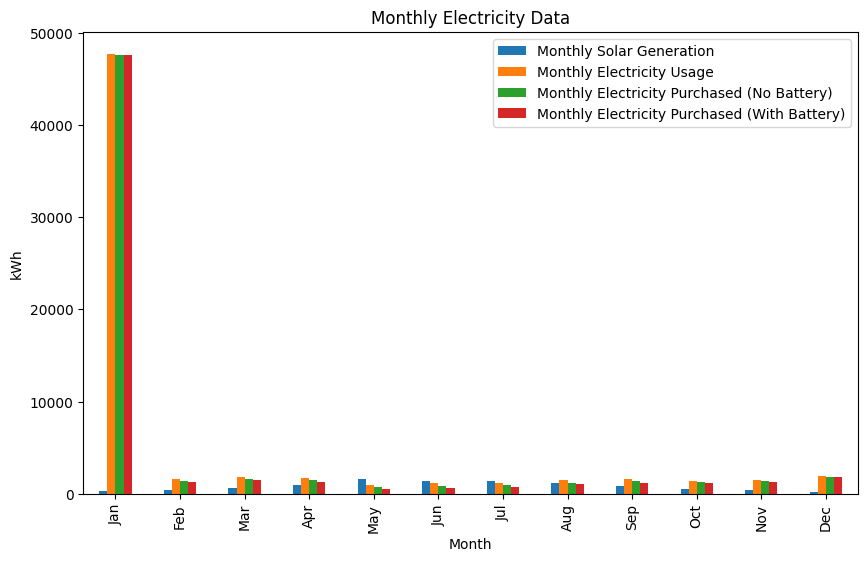

In [91]:
# Add a 'Month' column to the DataFrame
df['Month'] = df['Date/hour start'].dt.month

# Group data by month and aggregate sum for different columns
monthly_data = df.groupby('Month').agg(
    {
    'Solar electricity generation (kWh)': 'sum',
    'Electricity usage (kWh)': 'sum',
    'Electricity bought (kWh)': 'sum',
    'Electricity bought with battery installed': 'sum'
}).reset_index()

# Rename columns for clarity
monthly_data.rename(columns={
    'Solar electricity generation (kWh)': 'Monthly Solar Generation',
    'Electricity usage (kWh)': 'Monthly Electricity Usage',
    'Electricity bought (kWh)': 'Monthly Electricity Purchased (No Battery)',
    'Electricity bought with battery installed': 'Monthly Electricity Purchased (With Battery)'
}, inplace=True)

# Print the tabulated data
print(monthly_data)

# Create a bar chart to illustrate the monthly data
fig, ax = plt.subplots(figsize=(10, 6))

monthly_data.plot(kind='bar', x='Month', ax=ax)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('kWh')
ax.set_title('Monthly Electricity Data')

plt.legend(loc='upper right')
plt.show()

In [97]:
# Project forward for 20 years from 1 January 2022 the annual savings from installing the battery for the two scenarios below.

# For the two scenarios, calculate the Net Present Value (NPV) of the future annual savings.

#The scenarios are as follows:

# 1.	Electricity prices increase as expected by the government, 4% p.a.
# 2.	Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi.

# Define parameters
initial_year = 2022
projection_years = 20
electricity_price_increase_1 = 0.04  # 4% p.a.
electricity_price_increase_2_start = 0.04
electricity_price_increase_2_additional = 0.0025  # 0.25% p.a. increase each year

# Calculate projected annual savings for both scenarios
projected_savings_1 = []
projected_savings_2 = []
for year in range(initial_year, initial_year + projection_years):
    savings_1 = df['Amount Saved After Battery'].sum() * (1 + electricity_price_increase_1) ** (year - initial_year)
    savings_2 = df['Amount Saved After Battery'].sum() * (1 + electricity_price_increase_2_start + electricity_price_increase_2_additional * (year - initial_year))

    projected_savings_1.append(savings_1)
    projected_savings_2.append(savings_2)

# Create a DataFrame to store the projected savings
projection_df = pd.DataFrame({
    'Year': range(initial_year, initial_year + projection_years),
    'Projected Savings (Scenario 1)': projected_savings_1,
    'Projected Savings (Scenario 2)': projected_savings_2
})

# importing the numpy financial package
import numpy_financial as npf
from scipy.optimize import newton

# Calculate NPV for both scenarios
discount_rate = 0.05  # Discount rate for NPV calculation
npv_scenario_1 = npf.npv(discount_rate, projection_df['Projected Savings (Scenario 1)'])
npv_scenario_2 = npf.npv(discount_rate, projection_df['Projected Savings (Scenario 2)'])

print("Projected Savings:")
print(projection_df)
print("\nNPV (Scenario 1):", npv_scenario_1)
print("NPV (Scenario 2):", npv_scenario_2)

Projected Savings:
    Year  Projected Savings (Scenario 1)  Projected Savings (Scenario 2)
0   2022                      288.590910                      300.134546
1   2023                      300.134546                      300.856024
2   2024                      312.139928                      301.577501
3   2025                      324.625525                      302.298978
4   2026                      337.610546                      303.020455
5   2027                      351.114968                      303.741933
6   2028                      365.159567                      304.463410
7   2029                      379.765950                      305.184887
8   2030                      394.956588                      305.906364
9   2031                      410.754851                      306.627842
10  2032                      427.185045                      307.349319
11  2033                      444.272447                      308.070796
12  2034                      46

In [98]:
# Calculate the Internal Rate of Return (IRR) for the two scenarios in part by determining the discount rate that
#  equates the net present value of the future annual savings to the initial cost of the battery for each scenario.

# Define parameters
initial_year = 2022
projection_years = 20
initial_battery_cost = 2000  # Initial cost of the battery
electricity_price_increase_1 = 0.04  # 4% p.a.
electricity_price_increase_2_start = 0.04
electricity_price_increase_2_additional = 0.0025  # 0.25% p.a. increase each year

# using the figures aobtained above we proceed to create a DataFrame to store the projected savings
projection_df = pd.DataFrame(
    {
    'Year': range(initial_year, initial_year + projection_years),
    'Projected Savings (Scenario 1)': projected_savings_1,
    'Projected Savings (Scenario 2)': projected_savings_2
})

# Calculate NPV for both scenarios
discount_rate = 0.05  # Discount rate for NPV calculation
npv_scenario_1 = npf.npv(discount_rate, projection_df['Projected Savings (Scenario 1)'])
npv_scenario_2 = npf.npv(discount_rate, projection_df['Projected Savings (Scenario 2)'])

# Define functions for NPV calculation with IRR as the unknown variable
def npv_function_1(irr):
    return npf.npv(irr, projection_df['Projected Savings (Scenario 1)']) - initial_battery_cost

def npv_function_2(irr):
    return npf.npv(irr, projection_df['Projected Savings (Scenario 2)']) - initial_battery_cost

# Calculate IRR using the Newton-Raphson method
irr_scenario_1 = newton(npv_function_1, 0.1)
irr_scenario_2 = newton(npv_function_2, 0.1)

print("IRR (Scenario 1):", irr_scenario_1)
print("IRR (Scenario 2):", irr_scenario_2)

IRR (Scenario 1): 0.2046222634367226
IRR (Scenario 2): 0.16998588411281712
